In [45]:
import numpy as np
import cv2
import pandas
from matplotlib import pyplot as plt
import click_event

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Original Dimensions :  (442, 442)


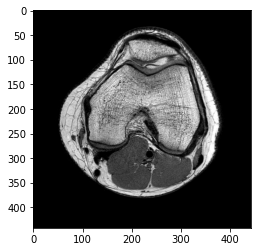

In [49]:
img = cv2.imread('mri-knee.jpeg', 0)
print('Original Dimensions : ',img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


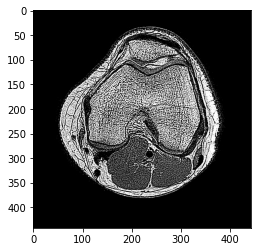

In [50]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Smoothed image : 


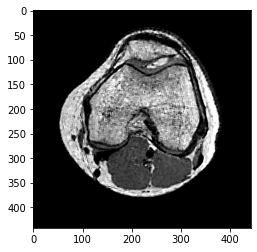

In [48]:
img = cv2.medianBlur(img,5)
print('Smoothed image : ')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Thresholded image : 


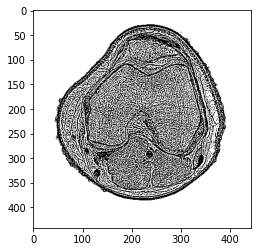

In [51]:
thresholded_image = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
print('Thresholded image : ')
plt.imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
plt.show()

Gaussian Blurred : 


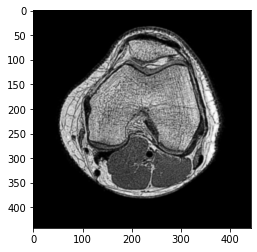

In [52]:
blur = cv2.GaussianBlur(img,(5,5),0)
print('Gaussian Blurred : ')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()


Otsu thresholding : 


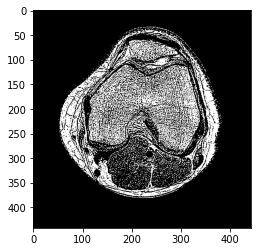

In [55]:
ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Otsu thresholding : ')
plt.imshow(cv2.cvtColor(th3, cv2.COLOR_BGR2RGB))
plt.show()


In [58]:
img = th3
scale_percent = 40 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

Resized Dimensions :  (176, 176)


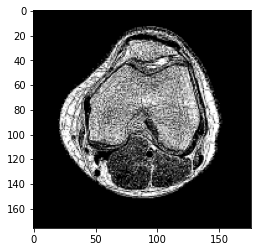

In [59]:
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
 
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
img_list = []
fg_img_list = []
index = 0
for i in range(resized.shape[0]):
    for j in range(resized.shape[1]):
        index = index + 1
        img_list.append([index, i, j, resized[i,j]])
        if resized[i,j] > 0:  #== 255:
            fg_img_list.append([index, i, j, resized[i,j]])
fg_img_df = pandas.DataFrame(fg_img_list, columns=['Index', 'X-coordinate', 'Y-coordinate', 'Intensity'])
fg_img_df.set_index('Index', inplace=True)
img_df = pandas.DataFrame(img_list, columns=['Index', 'X-coordinate', 'Y-coordinate', 'Intensity'])
img_df.set_index('Index', inplace=True)

In [66]:
fg_img_df.shape

(12562, 3)

In [67]:
fg_img_df.to_csv('..\dataset\mri\image_5\image_5_fg.csv')
img_df.to_csv('..\dataset\mri\image_5\image_5.csv')

In [68]:
cv2.imwrite('..\dataset\mri\image_5\image_5.jpg', resized)

True